In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame

In [4]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")

In [5]:
df = spark.read.json("gs://msca-bdp-project-goodreads/goodreads_books.json")

In [5]:
df.count(), len(df.columns)

(2360655, 29)

In [39]:
df.printSchema()

root
 |-- asin: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- author_id: string (nullable = true)
 |    |    |-- role: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- book_id: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- edition_information: string (nullable = true)
 |-- format: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- is_ebook: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: string (nullable = true)
 |-- kindle_asin: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- link: string (nullable = true)
 |-- num_pages: string (nullable = true)
 |-- popular_shelves: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- count: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- pub

In [7]:
df.select('ratings_count').distinct().count()

18628

In [8]:
df.groupBy('publisher').count().sort("count", ascending=False).show(30)

+--------------------+------+
|           publisher| count|
+--------------------+------+
|                    |654362|
|Createspace Indep...| 18604|
|  Smashwords Edition| 11513|
|           Harlequin| 10300|
|         Createspace|  9688|
|       HarperCollins|  8173|
|       Penguin Books|  7429|
|Oxford University...|  6741|
|    Brilliance Audio|  6350|
|             Vintage|  6338|
|             Berkley|  5546|
|    Ballantine Books|  5302|
|           Mondadori|  5266|
|Amazon Digital Se...|  5237|
|         CreateSpace|  4876|
|              Bantam|  4841|
|HarperCollins Pub...|  4827|
|             Penguin|  4673|
|              Marvel|  4663|
|        Pocket Books|  4612|
|Blackstone Audiob...|  4455|
|  St. Martin's Press|  4452|
|  Dreamspinner Press|  4430|
|     Harlequin Books|  4421|
|Gramedia Pustaka ...|  4257|
|              Signet|  4073|
|          Scholastic|  4055|
|          Smashwords|  4013|
|  Random House Audio|  3970|
|HMH Books for You...|  3937|
+---------

In [10]:
imp_feat = ['average_rating', 'country_code', 'description', 'edition_information', 
            'format', 'is_ebook', 'language_code', 'num_pages', 'publication_month', 'publication_day', 'publication_year', 'publisher', 'title']
for col in imp_feat:
    df.groupBy(col).count().sort("count", ascending=False).show(30)


+--------------+------+
|average_rating| count|
+--------------+------+
|          4.00|114105|
|          5.00| 63000|
|          3.00| 50476|
|          3.50| 36058|
|          4.50| 33253|
|          3.67| 33083|
|          3.75| 29333|
|          3.80| 27126|
|          4.33| 27125|
|          3.83| 26963|
|          3.88| 26127|
|          3.86| 24677|
|          4.25| 24141|
|          3.89| 23451|
|          3.92| 23248|
|          3.94| 22955|
|          3.90| 22617|
|          3.82| 22520|
|          4.12| 22486|
|          3.93| 22148|
|          3.71| 22090|
|          4.20| 21950|
|          3.85| 21429|
|          3.91| 21424|
|          4.14| 21335|
|          4.17| 21324|
|          3.96| 21227|
|          4.06| 21178|
|          3.78| 21137|
|          4.08| 20929|
+--------------+------+
only showing top 30 rows



+------------+-------+
|country_code|  count|
+------------+-------+
|          US|2360165|
|            |    490|
+------------+-------+



+--------------------+------+
|         description| count|
+--------------------+------+
|                    |412233|
|This book was con...|   613|
|                  <>|   511|
|This is a pre-192...|   469|
|Many of the earli...|   296|
|This work has bee...|   284|
|A Simon & Schuste...|   162|
|This work has bee...|   161|
|                   |   156|
|Source of legend ...|   131|
|Mary Shelley's Fr...|   127|
|This is a reprodu...|   127|
|        mjmw`@ qSSy@|   126|
|Emily Bronte's on...|   126|
|This work has bee...|   124|
|                rwy@|   117|
|Orphaned into the...|   112|
|Written in his di...|   107|
|In this historic ...|   106|
|As ferociously fr...|   105|
|Winston Smith is ...|   105|
|'Alone with the d...|   103|
|                   .|    96|
|Set in Russia in ...|    95|
|Bilbo Baggins is ...|    88|
|In what may be Di...|    88|
|Anna Karenina has...|    88|
|                 <>.|    87|
|"The first book t...|    83|
|Moral allegory an...|    82|
+---------

+--------------------+-------+
| edition_information|  count|
+--------------------+-------+
|                    |2142642|
|                   1|  11519|
|         Large Print|   9138|
|               First|   8992|
|          Unabridged|   8320|
|                 1st|   8176|
|       First Edition|   7791|
|         1st Edition|   5787|
|         lTb`@ l'wl~|   4626|
|         1st edition|   4099|
|            Abridged|   3804|
|      Second Edition|   3195|
|         2nd Edition|   2043|
|               first|   1656|
|               l'wl~|   1602|
|                   2|   1601|
|         2nd edition|   1450|
|                 2nd|   1351|
|       First edition|   1229|
|                  1a|   1049|
|           chp nkhst|   1012|
|       Third Edition|    985|
|         Large print|    845|
|              Second|    802|
|        lTb`@ lthny@|    775|
|Oxford World's Cl...|    735|
| Free Online Fiction|    599|
|             Omnibus|    558|
|                  UK|    548|
|       

+--------------------+------+
|              format| count|
+--------------------+------+
|           Paperback|894617|
|                    |646754|
|           Hardcover|359563|
|               ebook|188733|
|      Kindle Edition|125566|
|Mass Market Paper...| 42224|
|            Audio CD| 30588|
|           Audiobook| 17387|
|       Audible Audio| 11073|
|               Audio|  8335|
|     Unknown Binding|  8126|
|          Board Book|  4214|
|     Library Binding|  1694|
|          Board book|  1405|
|        Spiral-bound|  1369|
|           paperback|  1366|
|      Audio Cassette|  1152|
|              MP3 CD|  1057|
|       Leather Bound|  1029|
|     Trade Paperback|   641|
|                Nook|   526|
|              Broche|   524|
|             Unbound|   429|
|           Softcover|   407|
|           Capa Mole|   400|
|            Chapbook|   360|
|               Comic|   351|
|           hardcover|   312|
|               paper|   276|
|        Novelty Book|   272|
+---------

+--------+-------+
|is_ebook|  count|
+--------+-------+
|   false|1681260|
|    true| 678905|
|        |    490|
+--------+-------+



+-------------+-------+
|language_code|  count|
+-------------+-------+
|             |1060153|
|          eng| 708457|
|        en-US|  91452|
|        en-GB|  58358|
|          spa|  54524|
|          ita|  50902|
|          ara|  42978|
|          fre|  32046|
|          ger|  30941|
|          ind|  27291|
|          por|  23452|
|           nl|  17497|
|          tur|  14238|
|          per|  11821|
|          fin|  11611|
|          gre|  10024|
|          swe|   9914|
|          cze|   8564|
|        en-CA|   7652|
|          jpn|   7209|
|          bul|   7105|
|          rus|   6617|
|          pol|   6576|
|          msa|   5675|
|          rum|   5216|
|          dan|   5159|
|          ben|   3385|
|          vie|   3372|
|          tha|   3106|
|          scr|   3022|
+-------------+-------+
only showing top 30 rows



+---------+------+
|num_pages| count|
+---------+------+
|         |764133|
|       32| 34947|
|      320| 29945|
|      256| 29859|
|      224| 28978|
|      288| 28901|
|      192| 28726|
|      304| 24383|
|      352| 22845|
|      240| 22158|
|      384| 21104|
|      160| 20116|
|      336| 19699|
|      272| 19516|
|      128| 19030|
|      208| 18658|
|      144| 16162|
|      176| 15783|
|      400| 15656|
|      368| 15279|
|       96| 13648|
|      200| 12070|
|      416| 11943|
|       48| 11144|
|      112| 10864|
|       24|  9915|
|       64|  9666|
|       40|  9433|
|      432|  9127|
|      448|  8928|
+---------+------+
only showing top 30 rows



+-----------------+------+
|publication_month| count|
+-----------------+------+
|                 |882945|
|               10|147176|
|                9|146163|
|                1|138454|
|                4|129510|
|                3|128269|
|                5|127103|
|                6|119697|
|                8|116133|
|               11|113419|
|                2|108050|
|                7|105770|
|               12| 97964|
|               15|     1|
|               25|     1|
+-----------------+------+



+---------------+-------+
|publication_day|  count|
+---------------+-------+
|               |1024429|
|              1| 344041|
|             15|  56076|
|              5|  39344|
|              3|  39241|
|              7|  38622|
|              2|  38272|
|             28|  37862|
|             30|  36963|
|              4|  36814|
|              6|  36515|
|             12|  35132|
|             10|  34690|
|             25|  31987|
|             17|  31814|
|              8|  31685|
|             27|  31530|
|             14|  31418|
|             26|  31238|
|             20|  30924|
|             13|  30103|
|             29|  29047|
|             11|  29020|
|             16|  28971|
|              9|  28831|
|             24|  28685|
|             18|  28669|
|             21|  28668|
|             31|  28459|
|             19|  28038|
+---------------+-------+
only showing top 30 rows



+----------------+------+
|publication_year| count|
+----------------+------+
|                |599625|
|            2013|163752|
|            2014|156410|
|            2012|151180|
|            2015|135735|
|            2016|122417|
|            2011|116963|
|            2010| 91230|
|            2009| 77452|
|            2017| 73019|
|            2008| 68488|
|            2007| 60922|
|            2006| 51178|
|            2005| 45476|
|            2004| 39099|
|            2003| 35387|
|            2002| 31110|
|            2001| 28229|
|            2000| 26452|
|            1999| 23046|
|            1998| 21035|
|            1997| 18823|
|            1996| 16808|
|            1995| 15442|
|            1994| 13743|
|            1993| 12775|
|            1992| 11518|
|            1991| 10482|
|            1990|  9711|
|            1989|  8875|
+----------------+------+
only showing top 30 rows



+--------------------+------+
|           publisher| count|
+--------------------+------+
|                    |654362|
|Createspace Indep...| 18604|
|  Smashwords Edition| 11513|
|           Harlequin| 10300|
|         Createspace|  9688|
|       HarperCollins|  8173|
|       Penguin Books|  7429|
|Oxford University...|  6741|
|    Brilliance Audio|  6350|
|             Vintage|  6338|
|             Berkley|  5546|
|    Ballantine Books|  5302|
|           Mondadori|  5266|
|Amazon Digital Se...|  5237|
|         CreateSpace|  4876|
|              Bantam|  4841|
|HarperCollins Pub...|  4827|
|             Penguin|  4673|
|              Marvel|  4663|
|        Pocket Books|  4612|
|Blackstone Audiob...|  4455|
|  St. Martin's Press|  4452|
|  Dreamspinner Press|  4430|
|     Harlequin Books|  4421|
|Gramedia Pustaka ...|  4257|
|              Signet|  4073|
|          Scholastic|  4055|
|          Smashwords|  4013|
|  Random House Audio|  3970|
|HMH Books for You...|  3937|
+---------

+--------------------+-----+
|               title|count|
+--------------------+-----+
|           Jane Eyre|  338|
| Pride and Prejudice|  302|
|      Selected Poems|  301|
|        Frankenstein|  286|
|             Dracula|  274|
|   Wuthering Heights|  263|
|                Emma|  229|
|                1984|  198|
|       Anna Karenina|  190|
|   A Christmas Carol|  190|
|      Fahrenheit 451|  183|
|    The Great Gatsby|  179|
|The Picture of Do...|  176|
|       Madame Bovary|  166|
|           Peter Pan|  165|
|  Great Expectations|  164|
|   The Secret Garden|  162|
|Sense and Sensibi...|  153|
|     Treasure Island|  149|
|             Macbeth|  143|
|Alice's Adventure...|  141|
|              Hamlet|  139|
|        Little Women|  138|
|          Persuasion|  136|
|  The Scarlet Letter|  133|
|              Lolita|  132|
|          The Hobbit|  131|
|A Tale of Two Cities|  130|
|        Oliver Twist|  130|
|    Northanger Abbey|  127|
+--------------------+-----+
only showing t

In [15]:
df.select('title').distinct().count()

1674045

In [28]:
df_ger = df.filter(col('language_code')=='ger')
df_ger.select('description').show(10)

+--------------------+
|         description|
+--------------------+
|Spirit Lake ist d...|
|Was kann es Schli...|
|Wolf weiss nicht,...|
|Australien 1946. ...|
|Lack und Leder au...|
|Oft traurig und d...|
|Charlie Bone ist ...|
|Charles Bukowskis...|
|Gerald und Jessie...|
|"Schwejk, der nic...|
+--------------------+
only showing top 10 rows



In [36]:
df_lang_code_null.select('language_code').distinct().show()

+-------------+
|language_code|
+-------------+
|          fre|
|           en|
|          zho|
|          glg|
|          mya|
|          mkd|
|          mal|
|          sqi|
|          nld|
|          eus|
|          san|
|          ang|
|          und|
|          ira|
|          che|
|          anp|
|          haw|
|          gle|
|          nso|
|          crh|
+-------------+
only showing top 20 rows



### language code from description

In [4]:
from pyspark.sql import SparkSession
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import LanguageDetectorDL

documentAssembler = DocumentAssembler().setInputCol("description").setOutputCol("document")
assembled_df = documentAssembler.transform(df)

language_detector = LanguageDetectorDL.pretrained().setInputCols(["document"]).setOutputCol("language")
result_df = language_detector.transform(assembled_df)

result_df = result_df.withColumn("lang_trimmed", result_df["language.result"])

ld_wiki_tatoeba_cnn_21 download started this may take some time.
Approximate size to download 7.1 MB
[ | ]ld_wiki_tatoeba_cnn_21 download started this may take some time.
Approximate size to download 7.1 MB
[ / ]Download done! Loading the resource.


[ — ]

[ \ ]

2023-11-25 18:30:28.900228: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[OK!]


In [6]:
from pyspark.sql.functions import col, filter

result_df = result_df.filter(col('description')!='')

In [7]:
from pyspark.sql.functions import array_contains

result_df = result_df.filter(array_contains(col("lang_trimmed"), "en"))

In [9]:
result_df.select('lang_trimmed').distinct().count()

1

In [10]:
result_df.select('book_id', 'description').write.mode("overwrite").format("parquet").save("gs://msca-bdp-project-goodreads/clustering_desc_v1.parquet")

In [ ]:
result_df.groupBy('lang_trimmed').count().sort("count", ascending=False).show(5)

+------------+-------+
|lang_trimmed|  count|
+------------+-------+
|        [en]|1573792|
|          []| 412233|
|        [es]|  55232|
|        [it]|  51340|
|        [sl]|  36851|
+------------+-------+
only showing top 5 rows



In [5]:
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType

def empty_list(l):
    return len(l) == 0

empty_udf = udf(empty_list, BooleanType())
check_df_null_title = result_df.filter((empty_udf(result_df['lang_trimmed'])) & (result_df['title']!=''))

In [6]:
check_df_null_title = check_df_null_title.drop("lang_trimmed")

In [7]:
from pyspark.sql import SparkSession
from sparknlp.base import DocumentAssembler
from sparknlp.annotator import LanguageDetectorDL

documentAssembler = DocumentAssembler().setInputCol("title").setOutputCol("document")
assembled_df = documentAssembler.transform(check_df_null_title)

language_detector = LanguageDetectorDL.pretrained().setInputCols(["document"]).setOutputCol("language")
result_df_lang_title = language_detector.transform(assembled_df)

result_df_lang_title = result_df_lang_title.withColumn("lang_trimmed", result_df_lang_title ["language.result"])

ld_wiki_tatoeba_cnn_21 download started this may take some time.
Approximate size to download 7.1 MB
[OK!]


In [10]:
result_df_lang_title.groupBy('lang_trimmed').count().sort("count", ascending=False).show()

+------------+------+
|lang_trimmed| count|
+------------+------+
|        [en]|294783|
|        [fr]| 39442|
|        [es]| 15769|
|        [it]| 10578|
|        [de]| 10087|
|        [pt]|  5813|
|        [nl]|  5004|
|        [da]|  4277|
|        [fi]|  4274|
|        [hu]|  3144|
|        [pl]|  3006|
|        [sv]|  2776|
|        [cs]|  2553|
|        [lt]|  2508|
|        [ro]|  1895|
|        [sl]|  1676|
|        [bg]|  1639|
|        [et]|  1485|
|        [sk]|   717|
|        [el]|   653|
+------------+------+
only showing top 20 rows



In [8]:
df_combined = result_df_lang_title.union(result_df.filter((~empty_udf(result_df['lang_trimmed'])) & (result_df['title']!='')))

In [9]:
df_combined = df_combined.filter((df_combined['description']!='<>') & (df_combined['title']!='<>.') & (df_combined['description']!='rwy@') & (df_combined['title']!='mjmw`@ qSSy@') & (df_combined['title']!=''))

In [16]:
df_combined.show(2, vertical=True)

-RECORD 0------------------------------------
 asin                 |                      
 authors              | [{604031, }]         
 average_rating       | 4.00                 
 book_id              | 5333265              
 country_code         | US                   
 description          |                      
 edition_information  |                      
 format               | Paperback            
 image_url            | https://images.gr... 
 is_ebook             | false                
 isbn                 | 0312853122           
 isbn13               | 9780312853129        
 kindle_asin          |                      
 language_code        |                      
 link                 | https://www.goodr... 
 num_pages            | 256                  
 popular_shelves      | [{3, to-read}, {1... 
 publication_day      | 1                    
 publication_month    | 9                    
 publication_year     | 1984                 
 publisher            | St. Martin

In [10]:
from pyspark.sql.functions import col

df_cluster = df_combined.filter(col('description')!="")

In [ ]:
df_cluster.show(3, vertical=True)

23/11/24 21:52:50 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 11 for reason Container marked as failed: container_1700859490902_0001_01_000011 on host: hub-msca-bdp-dphub-students-rahulm-sw-k6qg.c.msca-bdp-student-ap.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
23/11/24 21:52:50 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 11 on hub-msca-bdp-dphub-students-rahulm-sw-k6qg.c.msca-bdp-student-ap.internal: Container marked as failed: container_1700859490902_0001_01_000011 on host: hub-msca-bdp-dphub-students-rahulm-sw-k6qg.c.msca-bdp-student-ap.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.


-RECORD 0------------------------------------
 asin                 |                      
 authors              | [{626222, }]         
 average_rating       | 3.23                 
 book_id              | 1333909              
 country_code         | US                   
 description          | Anita Diamant's i... 
 edition_information  | Abridged             
 format               | Audio CD             
 image_url            | https://s.gr-asse... 
 is_ebook             | false                
 isbn                 | 0743509986           
 isbn13               | 9780743509985        
 kindle_asin          | B000FC0PBC           
 language_code        |                      
 link                 | https://www.goodr... 
 num_pages            |                      
 popular_shelves      | [{2634, to-read},... 
 publication_day      | 1                    
 publication_month    | 10                   
 publication_year     | 2001                 
 publisher            | Simon & Sc

In [11]:
from pyspark.sql.functions import array_contains

df_cluster_final = df_cluster.filter(array_contains(col("lang_trimmed"), "en"))

In [ ]:
df_cluster_final.show(2, vertical=True)

-RECORD 0------------------------------------
 asin                 |                      
 authors              | [{626222, }]         
 average_rating       | 3.23                 
 book_id              | 1333909              
 country_code         | US                   
 description          | Anita Diamant's i... 
 edition_information  | Abridged             
 format               | Audio CD             
 image_url            | https://s.gr-asse... 
 is_ebook             | false                
 isbn                 | 0743509986           
 isbn13               | 9780743509985        
 kindle_asin          | B000FC0PBC           
 language_code        |                      
 link                 | https://www.goodr... 
 num_pages            |                      
 popular_shelves      | [{2634, to-read},... 
 publication_day      | 1                    
 publication_month    | 10                   
 publication_year     | 2001                 
 publisher            | Simon & Sc

In [12]:
df_cluster_final = df_cluster_final.select('book_id', 'description')

In [13]:
df_cluster_final.write.mode("overwrite").format("parquet").save("gs://msca-bdp-project-goodreads/clustering_desc.parquet")

### Visual EDA

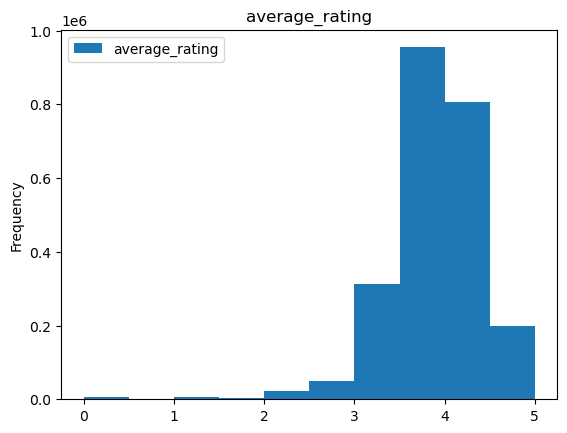

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [c[0] for c in df.dtypes if c[1] in ('int', 'double')]
for col in numerical_cols:
    df.select(col).toPandas().plot(kind='hist', title=col)
    plt.show()

In [38]:
df_combined = df_combined.withColumn("ratings_count", df_combined["ratings_count"].cast("double"))
df_combined = df_combined.withColumn("num_pages", df_combined["num_pages"].cast("double"))
df_combined = df_combined.withColumn("publication_month", df_combined["publication_month"].cast("int"))
df_combined = df_combined.withColumn("publication_day", df_combined["publication_day"].cast("int"))
df_combined = df_combined.withColumn("publication_year", df_combined["publication_year"].cast("int"))
df_combined = df_combined.withColumn("ratings_count", df_combined["ratings_count"].cast("double"))

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:43841)
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:43841)

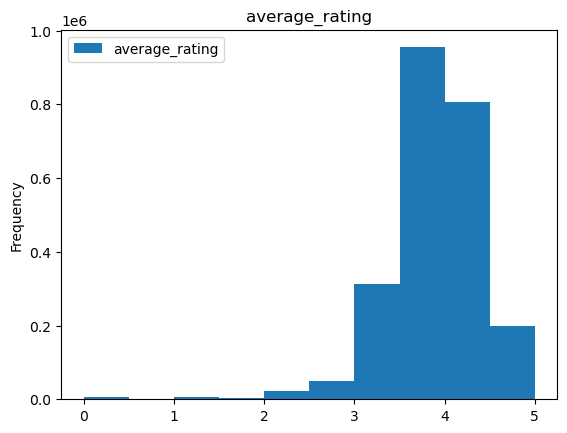

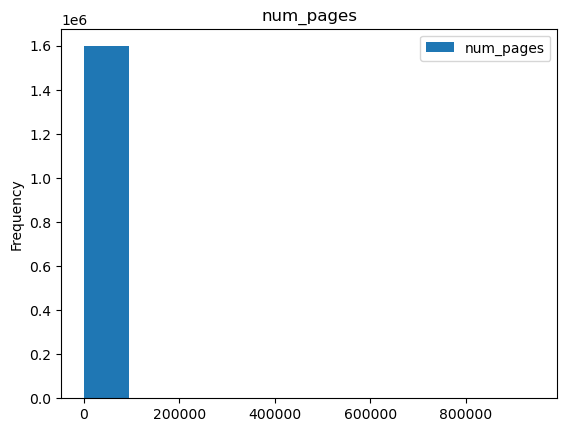

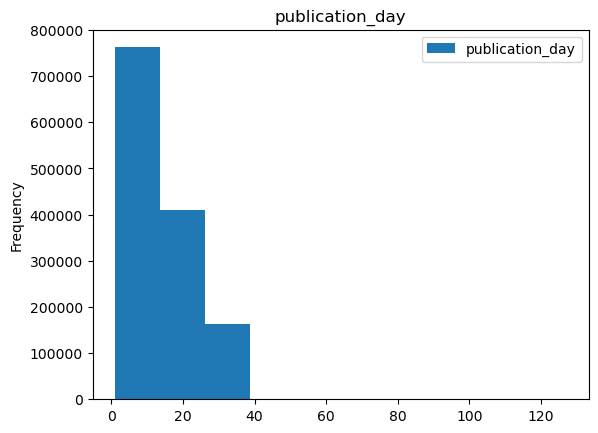

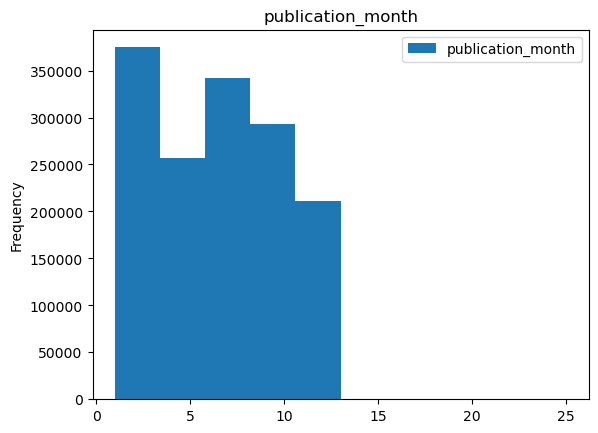

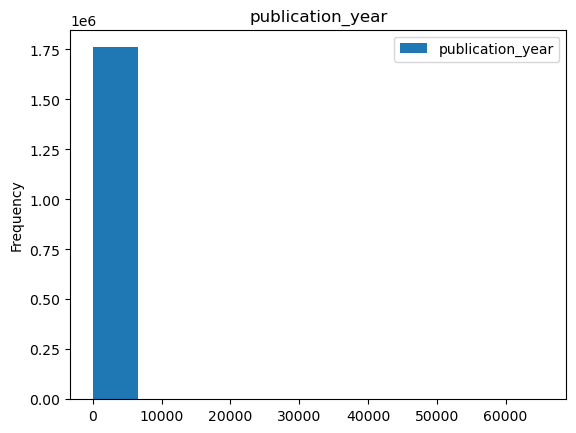

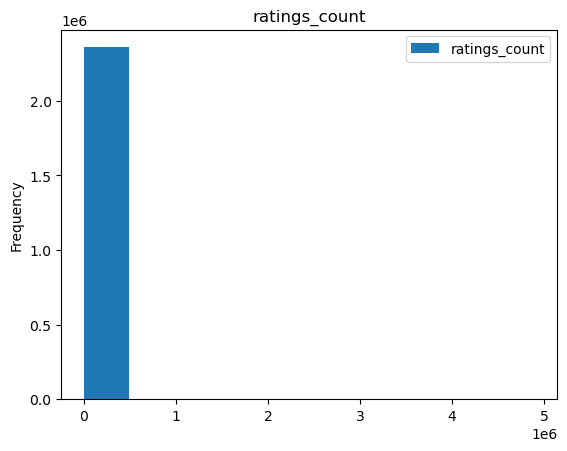

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [c[0] for c in df_combined.dtypes if c[1] in ('int', 'double')]
for col in numerical_cols:
    df_combined.select(col).toPandas().plot(kind='hist', title=col)
    plt.show()

In [26]:
from pyspark.sql.functions import to_date, concat, col

df_combined = df_combined.withColumn('date', to_date(concat(col('publication_year'), col('publication_month'), col('publication_day')), 'yyyyMMdd'))
df_combined.schema['date'].dataType

DateType

In [10]:
from pyspark.sql.functions import col
df_final = df_combined.filter(col("description") != '')

In [11]:
from pyspark.sql.functions import array_contains

df_final = df_final.filter(array_contains(col("lang_trimmed"), "[en]"))

to_drop = ["document", "language", "language_code", "country_code"]
df_final = df_final.drop(*to_drop)

In [15]:
df_final.show(2, vertical=True)

23/11/24 21:24:33 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


(0 rows)



In [12]:
df_cluster = df_final.select('description')

In [14]:
df_cluster.write.mode("overwrite").format("parquet").save("gs://msca-bdp-project-goodreads/clustering_desc.parquet")

In [ ]:
result_df